# Word2vec classification report

In [2]:
import pandas as pd 
from gensim.models import Word2Vec 
from preprocessing import split_file,clean_text,remove_stopwords,func_lemma,func_container,func_tokenize #preprocessing functions
from vectorizer import MeanEmbeddingVectorizer,TfidfEmbeddingVectorizer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [3]:
from gensim.models.word2vec import FAST_VERSION 
FAST_VERSION=1

In [4]:
import sys
sys.path.append('../lib/')

Read file from path using encoding='cp1251'

In [5]:
file=[]
path=r'rvm.txt' # path to file
for string in open(path,'r',encoding='cp1251'):
    file.append(string.lower())

Train dataset is a newspaper's corpus from http://cfrl.ruslang.ru/newspapers/rv/texts/rvm.txt

# Preprocessing data

Use split_file function for split text

In [6]:
file_split=split_file(file)

clean_text function returns clean text without signs in corpus. for example (.,!..?;')

In [7]:
text=clean_text([file_split[i][0] for i in range(len(file_split))])

remove stop words from dataset using stop_word collections

In [8]:
clear_text=remove_stopwords(text)

func_container function join sentences in news.

func_lemma is a function of lemmatization. Lemmatization takes context into account and transforms the word into its meaningful basic form, rather than just deleting the last few characters as stemming. 

In [9]:
s=func_lemma(func_container(clear_text))

Print 94 symbols from news

In [22]:
print(s[0][:94])

  президент  направлять председатель государственный дума геннадий селезнев заключение проект 


func_tokenize tokenize text into separate words.

In [10]:
w=func_tokenize(s) # w train dataset after preprocessing procedure

10 words from news

In [10]:
print(w[0][:10])

['президент', 'направлять', 'председатель', 'государственный', 'дума', 'геннадий', 'селезнев', 'заключение', 'проект', 'федеральный']


Preprocessing training data is finished

# Create and train word2vec model

w is a list of lists format. Word2Vec use parameters:  min_count=1,workers=6,size=300

In [15]:
model = Word2Vec(w,min_count=1,workers=6,size=300)

The most similar words to word 'дума'

In [16]:
[(result[0],'{:.6f}'.format(result[1])) for result in model.most_similar('дума')]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('закон', '0.999872'),
 ('государственный', '0.999861'),
 ('федеральный', '0.999846'),
 ('орган', '0.999838'),
 ('правительство', '0.999813'),
 ('власть', '0.999808'),
 ('поправка', '0.999803'),
 ('конституция', '0.999797'),
 ('астраханский', '0.999792'),
 ('российский', '0.999787')]

The words are well suited to the keyword: правительство, президент, рф, год, бюджет,страна.
For example, the word 'this' can generally be attributed to stop-words. But the word appeared here, as apparently it is not in the stop-words dictionary.
The numbers opposite each word mean maximizing the cosine proximity between the word vectors (scalar product of vectors)
The closer to 1, the closer the words are in meaning to each other


Similarity between 2 words "эстония" "рф"

In [17]:
'{:.6f}'.format(model.similarity('эстония', 'рф'))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


'0.999282'

The result was interesting. It is interesting in that the words are close in the sense of the name of the countries. But the corpus of Russian news is used in such a way, the words should be far in meaning. Most likely, at that time, some state events took place between the countries and this was often covered in the media and therefore was reflected as a result

# Validation word2vec model using test dataset 

In [11]:
path=r'lenta-ru-news.csv' # path to test dataset

Load test dataset into DataFrame format. Use delimiter=',' and encoding='utf-8-sig'

In [12]:
df = pd.read_csv(path,engine='python', delimiter=',',encoding = "utf-8-sig")

Print all topics in test dataset

In [12]:
df['topic'].unique()

array(['Россия', 'Спорт', 'Путешествия', 'Мир', 'Бывший СССР',
       'Интернет и СМИ', 'Силовые структуры', 'Экономика', 'Культура',
       'Дом', 'Наука и техника', 'Из жизни', 'Ценности', 'Бизнес',
       '69-я параллель', nan, 'Культпросвет ', 'Крым', 'Оружие',
       'Легпром', 'МедНовости', 'Библиотека', 'ЧМ-2014', 'Сочи'],
      dtype=object)

The most interesting topics are:

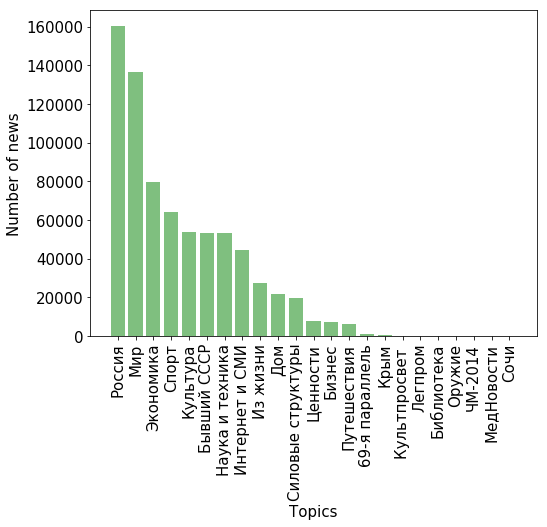

In [28]:
y_pos=np.arange(len(df['topic'].value_counts()))
performance=df['topic'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(y_pos,performance,align='center',alpha=0.5,color='g',width=0.8)
plt.xticks(y_pos,df['topic'].value_counts().index.tolist(),rotation=90,size=15)
plt.yticks(size=15)
plt.xlabel('Topics',size=15)
plt.ylabel('Number of news',size=15)
plt.show()

Thus, topics related with Россия and Мир news are more interested for people than Бизнес or Наука и техника news 

In [29]:
df.head()

,url,title,text,topic,tags
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт,Зимние виды
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,Сотрудники социальной сети Instagram проанализ...,Путешествия,Мир
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование...,С начала расследования российского вмешательст...,Мир,Политика
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании зами...,Хакерская группировка Anonymous опубликовала н...,Мир,Общество


In [30]:
df.loc[0,'text']

'Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.'

Text has got stop words which add noise in data

In [13]:
test_dataset=[]
for text in df['text'][:100]: # take only 100 news from corpus
    test_text=clean_text(text)
    test_text=[''.join(word for word in test_text if not word=='')]
    test_text=remove_stopwords(test_text)
    test_text=func_lemma(test_text)
    test_text=func_tokenize(test_text)
    test_dataset.append(*test_text)

Print words from first news

In [42]:
print(test_dataset[0])

['вицепремьера', 'социальный', 'вопрос', 'татьяна', 'голикова', 'рассказывать', 'какой', 'регион', 'россия', 'зафиксировать', 'наиболее', 'высокий', 'смертность', 'рак', 'сообщать', 'риа', 'новость', 'по', 'слово', 'голикова', 'чаща', 'онкологический', 'заболевание', 'становиться', 'причина', 'смерть', 'псковский', 'тверская', 'тульский', 'орловский', 'область', 'также', 'севастополь', 'вицепремьера', 'напоминать', 'главный', 'фактор', 'смертность', 'россия', 'рак', 'болезнь', 'система', 'кровообращение', 'в', 'начало', 'год', 'становиться', 'известно', 'смертность', 'онкологический', 'заболевание', 'среди', 'россиянин', 'снижаться', 'впервые', 'год', 'по', 'данные', 'росстат', 'год', 'рак', 'умирать', 'тысяча', 'человек', 'это', 'процент', 'маленький', 'год', 'ранее']


The first word was unexpected.It was “вицепремьер”, but it became a “вицепремьера”? In pymystem3 library used model Mystem. This model converted word from “вицепремьер” to “вицепремьера” after lemmatization

Data are ready for validation model

Realization of word2vec model:

model = Word2Vec(w,min_count=2,workers=6,size=300,window=3,hs=0,sg=1)

In [32]:
model = Word2Vec(w,min_count=2,workers=6,size=300,window=3,hs=0,sg=1)

Join vectors and words into dict structure

In [15]:
model_dict={}
for text in test_dataset:
    for word in text:  
        word_vectors = model.wv
        if word in word_vectors.vocab: # if word in vocab
            model_dict.update({word:model[word]}) # add to dict
        else:
            continue

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Perhaps not all news words are transformed into vectors.
due to min_count = 2, part of the words will be discarded since they are encountered less often min_count times in the corpus. also not all words from the test dataset are presented in the vocab

save results

In [36]:
%store model_dict > filename.txt

Writing 'model_dict' (dict) to file 'filename.txt'.


Transform test dataset. Take words of texts from test dataset if they are in vocab

In [16]:
transform_corpus=[]
for text in test_dataset:
    transform_corpus.append([model[word] for word in text if word in model.wv.vocab])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


For classification, LogisticRegression,RandomForest,SVM are used.
For example, accuracy_score metric is used

In [61]:
# list of classification models
clfs=[LogisticRegression(multi_class='multinomial',solver='sag', max_iter=1000),SVC(kernel='poly', gamma='scale', coef0=1, degree=3),RandomForestClassifier(n_estimators=400)]

def classification_models(X,y):
    ans=[]
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
    for number,method in enumerate(clfs):
        method.fit(X_train,y_train)
        ans.append('Classifier %d: accuracy score: %.3f' % (number,accuracy_score(y_test,method.predict(X_test))))
    return ans

MeanEmbeddingVectorizer class return mean of word vectors in text

In [59]:
X=MeanEmbeddingVectorizer(model_dict).transform(transform_corpus)
classification_models(X,df['topic'][:100])

['Classifier 0: accuracy score: 0.650',
 'Classifier 1: accuracy score: 0.650',
 'Classifier 2: accuracy score: 0.700']

TfidfEmbeddingVectorizer class return weighted average of words

In [62]:
X1=TfidfEmbeddingVectorizer(model_dict).fit(test_dataset,df['topic'][:100]).transform(test_dataset)
classification_models(X1,df['topic'][:100])

['Classifier 0: accuracy score: 0.800',
 'Classifier 1: accuracy score: 0.850',
 'Classifier 2: accuracy score: 0.850']

From the results it follows that a weighted average of words (TfidfEmbeddingVectorizer) gives better results than simple averaging of words vectors (MeanEmbeddingVectorizer)

The PCA is implemented to visualize the resulting vectors. Each word uses a dimension of 300. PCA allows us to reduce the number of components, which allows us to get new components in all directions with different dispersions (data scatter)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


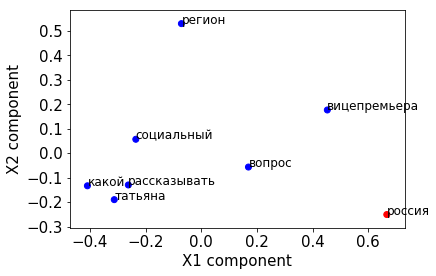

In [20]:
X = model[list(model_dict.keys())[:8]] # take only first 8 words
y=model[df.loc[0,'topic'].lower()] 
data=np.vstack((X,y)) # join words from text and topic
pca = PCA(n_components=2) # 2 components
result = pca.fit_transform(X)
colors=[*(['b']*7),'r'] 
# output results
plt.scatter(result[:, 0], result[:, 1],c=colors)
words = list(model_dict.keys())[:8]

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]),size=12)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('X1 component',size=15)
plt.ylabel('X2 component',size=15)
plt.show()

Words are located a short distance from the label "Россия." The closest to the title of the topic are the words "регион" and "вопрос."

In [148]:
%store model_dict > model1.txt

Writing 'model_dict' (dict) to file 'model1.txt'.
